# Exercise04
Hao-Tien Kuo

## Section 1: Analysis

In [1]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

df_custard = pd.read_excel("frzn_custard.xlsx")

An explanation of why the analysis is being conducted and what the hypotheses are:

We conduct this analysis because we would like to confirm if the friend's statement is valid. That is, whether there really are more customers on hot days. If the statement is not statistically significant, then we can probabily infer that her tiredness is caused by something else.

1. What is the outcome?

Sales numbers.

2. What is the main effect/predictor she wants to understand the impact of?

Weather (daily temperature).

3. What is the hypothesis?

H0: Temperature has no correlation with sales. (β1 = 0)

HA: Temperature has a positive correlation with sales. (β1 > 0)

In [3]:
# Descriptive information about the data, including summary statistics 
# (such as number of observations, measures of central tendency, & measures of dispersion)

df_custard.agg(['count', 'mean', 'median', statistics.mode, 'var', 'std', 'sem', 'min', 'max'])

,Temperature_F,Frzn_Custard_Sales
count,180.000000,178.000000
mean,79.305556,2936.382022
median,79.000000,2955.500000
mode,79.000000,2528.000000
var,107.654718,159475.480353
std,10.375679,399.343812
sem,0.773357,29.932084
min,57.000000,1959.000000
max,105.000000,3971.000000


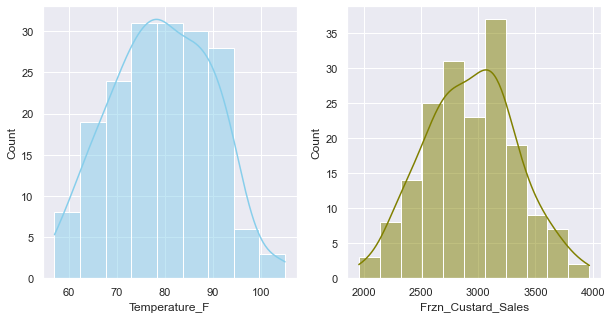

In [4]:
# plots of the data distributions

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=df_custard['Temperature_F'], kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df_custard['Frzn_Custard_Sales'], kde=True, color="olive", ax=axs[1])

plt.show()

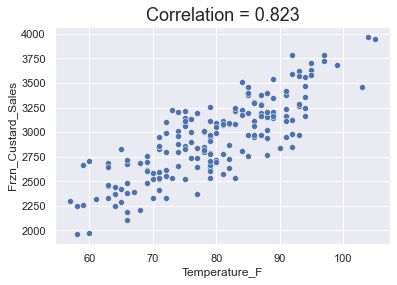

In [18]:
# Descriptive information about the relationships between the two variables, including correlation and scatterplots

cor_custard = df_custard['Temperature_F'].corr(df_custard['Frzn_Custard_Sales'])

sns.scatterplot(data=df_custard, x="Temperature_F", y="Frzn_Custard_Sales")
plt.title("Correlation = %.3f" % cor_custard)
plt.rc('axes', titlesize=18)
plt.show()

# Highly positive correlation between temperature and sales

In [44]:
# A regression analysis to test the hypothesis.

df_custard.dropna(inplace=True) # Rows with missing data will need to be removed.

import statsmodels.api as sm
y = df_custard['Frzn_Custard_Sales'] # dependent variable

X = df_custard[['Temperature_F']] # independent variable
X = sm.add_constant(X) # add constant to predictor variables

model = sm.OLS(y, X).fit() # fit linear regression model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Frzn_Custard_Sales   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     369.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           4.21e-45
Time:                        22:40:35   Log-Likelihood:                -1217.6
No. Observations:                 178   AIC:                             2439.
Df Residuals:                     176   BIC:                             2445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           423.2649    131.833      3.211      0.002     163.088     683.441
Temperature_F    31.6496      1.646     19.224      0.000      28.400      34.899
==============================================================================
Omnibus:                        7.647   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.999
Skew:                          -0.127   Prob(JB):                        0.135
Kurtosis:                       2.311   Cond. No.                         619.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A description of the results of the analysis:

- Interpretation of the coefficients: The intercept is 423.3, which indicates the sales number given that the temperature is zero. The coefficient of temperature is 31.6, meaning that a unit increase in temperature would boost sales by 31.6 units, vice versa.

- Description of the goodness of fit: The R-squared is 0.677, meaning that approximately 67.7% of variation in sales can be explained by temperature, which is a pretty good number considering there is only a single predictor variable.

- Whether the results are statistically significant: The model's F-statistic and the t-stats of the coefficients are all statistically significant. (P-value < 0.05)

## Section 2: Gradient Descent

Write a program in Python that uses gradient descent to find the regression coefficients (βs) for the frozen custard data in Section 1. 

Cite the source: https://medium.com/analytics-vidhya/linear-regression-gradient-descent-intuition-and-math-c9a8f5aeeb22

In [124]:
# Our equations above need bias term in x which should always be 1 
def add_bias_term(x):
    # np.ones(n) will give new array of length n whose all elements are 1 
    # np.c_ concatinates two array column wise
    return np.c_[np.ones(len(x)),x]

# Root mean square cost function
def rmse_cost_func(P,Y):
    ## model is array with bias and coffecients values
    return np.sqrt(np.mean((P-Y)**2))

# Finds gradient of cost function
def gradient_of_cost(x,y,model):
    preds = predict(x,model)
    error_term = preds-y
    
    # np.matmul performs matrix multiplication
    # x.T is transpose of matrix x
    xt_dot_error_term = np.matmul(x.T,error_term)/len(x)
    return xt_dot_error_term

# Do prediction
def predict(x,model):
    #np.matmul performs matrix multiplication
    return np.matmul(x,model)

def find_linear_regression_model(x,y, n_epochs = 10000, neta = 0.001):
    cost_history = []
    
    # Initialize all parameters(wj's) to zero
    model = np.zeros(len(x[0]))
    
    # do n_epochs iteration
    for _ in range(n_epochs):
        grad = gradient_of_cost(x,y,model)
        y_pred = predict(x, model)
        cost_history.append(rmse_cost_func(y_pred, y))
        
        # move parameters closer to optimum solution in every step 
        next_model = model - neta*grad
        model = next_model
        
    return model, cost_history

In [127]:
X = np.array(df_custard.Temperature_F).reshape(-1, 1)
X = add_bias_term(X)
y = np.array(df_custard.Frzn_Custard_Sales)

model, cost_history = find_linear_regression_model(X, y)
print("\nmodel(w0,w1)\n", model)


model(w0,w1)
 [2.09605117e-16 8.23006909e-01]


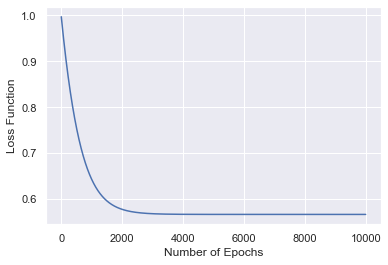

In [128]:
# graph the loss function over iterations
plt.plot(np.arange(len(cost_history)), cost_history)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Function")
plt.show()

In [129]:
# Standardize your X and Y variables. 

df_custard['Temperature_F'] = (df_custard['Temperature_F'] - df_custard['Temperature_F'].mean()) / df_custard['Temperature_F'].std()
df_custard['Frzn_Custard_Sales'] = (df_custard['Frzn_Custard_Sales'] - df_custard['Frzn_Custard_Sales'].mean()) / df_custard['Frzn_Custard_Sales'].std()

In [130]:
# Rerun your section 1 model using the standardized inputs. 
y = df_custard['Frzn_Custard_Sales']
X = df_custard[['Temperature_F']] 
X = sm.add_constant(X) 

model2 = sm.OLS(y, X).fit() 
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Frzn_Custard_Sales   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     369.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           4.21e-45
Time:                        23:36:32   Log-Likelihood:                -151.38
No. Observations:                 178   AIC:                             306.8
Df Residuals:                     176   BIC:                             313.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.469e-18      0.043  -8.13e-17      1.000      -0.084       0.084
Temperature_F     0.8230      0.043     19.224      0.000       0.739       0.908
==============================================================================
Omnibus:                        7.647   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.999
Skew:                          -0.127   Prob(JB):                        0.135
Kurtosis:                       2.311   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
# Compare your results using gradient descent and using the module you used in Section 1 for the standardized inputs.
X = np.array(df_custard.Temperature_F).reshape(-1, 1)
X = add_bias_term(X)
y = np.array(df_custard.Frzn_Custard_Sales)

model, cost_history = find_linear_regression_model(X, y)
print("\nmodel(w0,w1)\n", model)


model(w0,w1)
 [2.77586942e-17 8.23006909e-01]


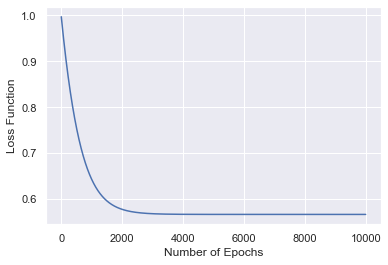

In [132]:
# Plot the loss (i.e. cost) function over the iterations
plt.plot(np.arange(len(cost_history)), cost_history)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Function")
plt.show()